# Introduction to digital forensics of cybercrime
## Assignment 2 - Database forensics
### Project Group 4
    Loek van der Gugten 1975331
    Reinier de Ridder   1701134
    Frank Nijeboer      2011972
    Jos Bartels         1941224
    Dionne Kingma       2419874
    Hanneke Verschoor   1954334

## Introduction
DDos attacks happen quite frequently in cyberspace nowadays. DDoS means distributed denial-of-service. What happens during a DDoS attack is that a system is flooded with data coming from different services, overloading the system and making it crash. DDoS attacks can be performed by using a booter. The whole idea of this kind of website is that a customer pays the website to do an attack on a certain service and the owner of the website makes sure the attack happens. A consequence of a DDoS attack is the fact that it can lead to data leaks. This can be dangerous for both the companies and the customers they have, because possible sensitive information is now available to the public. Booter websites have databases themselves as well and these can be obtained by performing a DDoS attack as well. An example of a booter website that had their database leaked is twbooter. Their database was leaked by the website krebsonsecurity.com. This database will be used in the analysis that will be done and is provided by the University of Twente. These databases are interesting when trying to prevent these DDoS attacks. The databases can give information about who perform these attacks. If DDoS attacks can be fully stopped is questionable, but the information of these booter databases is a step in the right direction. 
For this research, a database of one of these booter websites (twbooter) was provided. As stated before, databases get leaked and we already were aware of this. However, it was not clear what sort of data these databases actually contain. With this research, deeper insight into the information a database contains and how to read these databases will be obtained. 
the goal of this research is to get a better understanding about what kind of information can be found in leaked databases and to familiarize with the way of analyzing this information. The database for this research is from twbooter and the database is leaked by the website https://krebsonsecurity.com/. To establish the goal, a few questions are provided by the University. These questions include the top ten victims of the database (IP addresses and domain name) and the most used type of attack. 


## Methodology
The dataset used in this assignment was provided by the University of Twente. One slight edit has been made to this document: the url subdomains and prefix have been removed from the victim ip addresses and urls. This was done to enable an easier analysis of the victims using regular expressions. In this dataset a significant amount of information can be found on attacks that were performed using twbooter, like the number of the attack, the process id, victim id/domain name, port service type, the type of attack, the duration of the attack, the time at which the attack was performed and whether or not the attack got stopped. The dataset also includes information about the client attacker and the specific server used in the attack. The dataset was exported into Python to make it easier to perform the analysis on the data. 
To answer the main research question, all of these different aspects of the dataset were used. First the amount of rows were counted to determine the total number of attacks that were carried out using this specific booter website. The number of unique users was found by looking at the amount of unique entries in the column 'client_attacker'. This gives an idea of how many people come to this website to perform attacks and can also provide an estimate about how many attacks each user performs. Some data was collected on the victims as well. This was done by determining the top ten victim ip addresses. The numbers were retrieved by filtering the entries of this column on a combination of 4 numbers with dots in between (as is the format of an ip address), and then per unique occurrence counting the amount of duplicates. This was done for the domain names as well. The only difference is that instead of filtering the entries on numbers with dots in between, they are filtered on containing a (non)capital letter. Domain names were included in addition to ip addresses, because they could be more interesting since they could be valued more than an IP address, but this isn't necessarily the case. This data on the ip-addresses as well as the domain names is interesting for the users of these. It shows them that they are being targeted quite frequently compared to other victims, which could raise awareness and could have better security measures as a result. 
For the duration of the attacks, the column duration was used. This was used to determine how long the longest attack carried out by this website was. This was done by sorting all of the items in the dataset from high to low. It was also determined how many attacks took this long. The amount of attacks that took this long gives an indication at what rate this happens.
Another aspect of the dataset that sparked some interest was the type of attacks one could perform. To determine the top 3 most used attacks the amount of occurrences in the column 'type' were counted by type of attack and then the top three of the list were plotted. 
Another question that was asked was which owner id out of the dataset performed the most attack using this booter website. For this, the column client_attacker was used once more. The id that performed the highest amount of attacks was found by calculating the id that occurs most frequently. Also, a look was taken at the website krebsonsecurity.com and how many attacks they suffered from this booter website. This was done because they were the ones that actually leaked the dataset, which sparked some interest in the question of how many times they actually suffered from such an attack from this specific booter. The result was found by looking up the amount of entries that contain 'krebsonsecurity.com' in the column 'victim'.
	Two other statistics were included as well. First the amount of times an attack was performed with the port 80. The data was gathered by filtering in the column  port_service_type on the value 80. The result of this question is of interest because port 80 is the default HTTP port, so it shows how often a HTTP connection has been targeted. Secondly, the statistics for the amount of the attacks that were stopped were included into the results. This was done because it shows how many of the attacks were actually successful. The data was retrieved by counting the amount of ones (stopped) and zeros (not stopped).


## Results
The data used in this assignment is loaded from the provided 'table_attack_twbooter.xls'. One slight edit has been made to this document: the url subdomains and prefix have been removed from the victim ip adresses and urls. This is to enable easier analysis of the victims using regular expressions.

For each data segment we briefly explain how we gathered it and why it is useful to have it.

In [1]:
# Load the DataFrame imported in preprocessing.py
from preprocessing import attack_df
# Import matplotlib library
import matplotlib.pyplot as plt

In [2]:
# Display the DataFrame to show used data as imported from 'table_attack_twbooter.xls'
attack_df

,id,processid,victim,port_service`_type,type,duration,time,stopped,client_attacker,server_used_in_th_attack
0,1,5672,91.214.20.52,80,ESSYN,33,1358989954,1,1,94.102.49.76
1,2,29065,91.214.20.52,80,UDP,1783,1358990329,1,1,93.174.93.30
2,3,23005,78.31.8.124,80,ESSYN,393,1358991360,0,1,89.248.172.97
3,4,29411,199.204.44.188,80,ESSYN,60,1358995416,0,4,93.174.93.30
4,5,19298,chrome-mods.com,80,RUDY,50000,1358995471,1,3,72.9.144.80
...,...,...,...,...,...,...,...,...,...,...
48768,48840,15874|1992|28878|32327,109.234.152.119,1973,ESSYN,300,1363351101,0,258,94.102.49.79|94.102.51.252|89.248.160.146|89.2...
48769,48841,15022|19087|28887,94.242.205.227,80,SOURCE,65,1363351473,1,261,72.9.144.80|67.222.156.241|89.248.160.146
48770,48842,15026|19091|28896,94.242.205.227,80,ARME,65,1363351493,1,261,72.9.144.80|67.222.156.241|89.248.160.146
48771,48843,15898|3409|32693|2010,94.242.205.227,80,ESSYN,65,1363351507,1,261,94.102.49.79|89.248.172.96|89.248.162.242|94.1...


## Analysis

### The total number of attack records
As described in the 'Methodology', this number simply is the total amount of row entries. This number shows how many attacks have been performed.
After the data was collected and analyzed in the way described in the method, the following results showed up. The total number of attacks this dataset contained was 48773 

In [27]:
# Get available index, effectively number of entries in the DataFrame
attack_entries = attack_df.index
# Display lenght of index, resulting in int of entries in the DataFrame
print("The amount of attacks recorded in the database is: {}.".format(len(attack_entries)))

The amount of attacks recorded in the database is: 48773.


### Number of unique users
This number can be found by looking at the amount of unique entries in the column 'client_attacker'. It gives an idea of how many people come to this website to perform attacks and can also provide an estimate about how many attacks each user performs. 
These attacks were not performed by 48773 unique users, but the client attacker column showed that a total of 277 unique users performed all these attacks.

In [26]:
# Get number of unique values in "client_attacker" column
attackers = attack_df["client_attacker"].nunique()
# Display number
print("There are {} unique attackers.".format(attackers))

There are 277 unique attackers.


### Which owner id performed most of the attacks
Of these 277 unique users, some performed an extremely high amount of attacks. The attacker id which performed the most attacks is ID 272. This attacker id performed 2307 attacks using this specific booter website. In the graph below, the top ten amount of attacks performed by one id is shown as well. 

The two lines and the diagram below show the id that performed the highest amount of attacks and a top 10 diagram of the id's that performed attacks. The id that performed the highest amount of attacks we found by calculating the id that occurs most frequently in the column 'client_attacker'. The values in the diagram are determined like the types of attacks in the previous segment.

This information shows us which owner id's performed the highest amount of attacks. If we were to try and identify attackers these would be id's to focus on since they performed a lot of attacks.

Most attacks were perfomed by attacker: 272.
The amount of attacks carried out by user 272 is 2307.


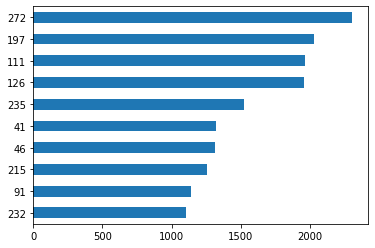

In [44]:
# Get the modes (highest frequency value) of 'client_attacker' column
attack_id = attack_df['client_attacker'].mode()
# Display modes
print("Most attacks were perfomed by attacker: {}.".format(int(attack_id)))

# Count number of entries for each value in 'client_attacker' column
attack_ids = attack_df['client_attacker'].value_counts()
print("The amount of attacks carried out by user {} is {}.".format(int(attack_id), int(attack_ids.head(1))))
# Take the top 10, sort these in descending order and plot as a horizontal bar graph
attack_ids.head(10).sort_values().plot.barh()
# Display graph
plt.show()

### The longest attack duration
The duration of these attacks varies from 15 To 500000 minutes. The longest attacks performed using this booter are 500000 minutes.

Trivially the longest attack duration is the highest number in the column 'duration'. This is the first number below. We also determined how many attacks took this long, see the second number below.

With this information we now have sort of an upper bound on how long a single attacks last. The amount of attacks that took this long also show us at what rate this happens.

In [34]:
# Get biggest value in 'duration' column
min_duration = attack_df['duration'].min()
print("The lowest duration of an attack in this database is {}.".format(min_duration))
duration = attack_df['duration'].max()
amount_of_duration = attack_df['duration'].value_counts().get(duration)
# amount_of_duration = attack_df['duration'].count(duration)
# Display value
print("The maximum duration of {} minutes was recorded {} times in the database".format(duration, amount_of_duration))

The lowest duration of an attack in this database is 15.
The maximum duration of 500000 minutes was recorded 35 times in the database


### Top 10 Victim IP Addresses
From the 48773 attacks, the top ten victim ip-addresses as well as the top ten domain names are the following. 

The graph below shows the top 10 occuring ip addresses in the column 'victim'. The numbers have been retrieved by filtering the entries of this column on a combination of 4 numbers with dots in between (as is the format of an ip address), and then per unique occurence counting the amount of duplicates. The 10 most occuring ones are listed in the diagram.

This data is interesting for the users of those ip addresses. It shows them that they are being targeted quite frequently compared to other victims. If we were to investigate these addresses further, it could also show us motives for the attackers to attack these addresses so often.

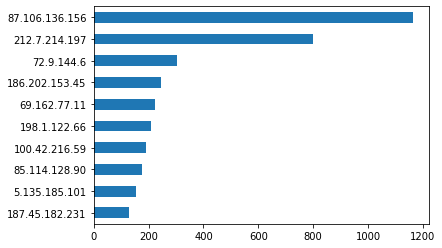

In [7]:
# IPython magic command for bts setup
%matplotlib inline
# Get values in column 'victim' that contains an ip adress (RegEx)
victims_ips = attack_df[attack_df["victim"].str.contains("[0-9].[0-9].[0-9].[0-9]")]
# Count number of entries for each value in 'victim' column, take the top 10, sort these in descending order and plot as a horizontal bar graph
victims_ips["victim"].value_counts().head(10).sort_values().plot.barh()
# Display the graph
plt.show()

### Top 10 Victim Domain Names
As seen in the graph above, the most attacked ip address is 87.106.136.156, with almost 1200 attacks performed on this website. The amount of attacked performed on the top ten ip addresses ranges from almost 1200 for number one to about 150 for number 10. For the top ten victim domain name, the most attacks were performed on the website www.relog.co.il. The amount attacks for the top ten domain names range from about 600 to 100. 

This diagram has been generated similarly to the previous one ('Top 10 Victim IP Addresses'). The only difference is that instead of filtering the entries on numbers with dots in between, they are filtered on containing a (non)capital letter.

Like the way we analysed this data, the use for it is also the same as the previous section 'Top 10 Victim IP Addresses'. Domain names could be more interesting because they could be valued more than an IP address, but this isn't necessarily the case.

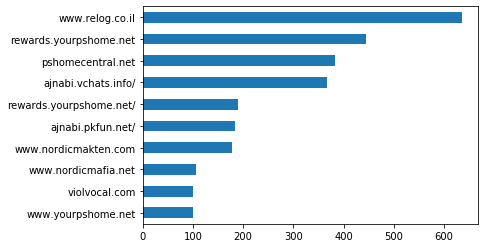

In [8]:
# Get values in column 'victim' that contains an url (RegEx)
victim_domains = attack_df[attack_df["victim"].str.contains("[A-z]")]
# Count number of entries for each value in 'victim' column, take the top 10, sort these in descending order and plot as a horizontal bar graph
victim_domains["victim"].value_counts().head(10).sort_values().plot.barh()
# Display the graph
plt.show()

### How many attacks 'krebsonsecurity.com' suffered
Krebsonsecurity.com, the website that leaked the dataset of this particular booter website, is not the top ten of either the victim IP addresses or domain names. This website of journalist Brian Krebs has only been the victim of 15 out of the 48773 attacks this booter facilitated.

The number below shows how many attacks the domain 'krebsonsecurity.com' has suffered. It is found by looking up the amount of entries that contain 'krebsonsecurity.com' in the column 'victim'.

This number shows how often the domain of journalist Brian Krebs has been targeted by attacks from TWBooter.

In [35]:
# Get entries containing 'krebsonsecurity.com' from 'victims' column
# This ensures also values with added subdomains etc are included
kreb_attacks = attack_df[attack_df.victim.str.contains('krebsonsecurity.com')]
# Display length of entries, resulting in int of entries in the DataFrame
print("Krebsonsecurity.com has suffered {} attacks.".format(len(kreb_attacks)))

Krebsonsecurity.com has suffered 15 attacks.


### Top 3 attack type
The type of attacks used to perform these kind of attacks varies as well. The top three attack types are ESSYN, UDP and RUDY, as can be seen in the graph below. 

Here we display the top 3 types of attacks. The diagram below shows the three types of attacks, with the amount of attacks displayed on the horizontal axis. We determined these values by counting the amount of occurences in the column 'type' per type of attack and then plotting the top three from that list.

This shows which type(s) of attack(s) is (are) executed most often, and thus which type of attack is most likely preferred by attackers. This information could help with determining what type of attack to focus on when for example defending your system from these attacks.

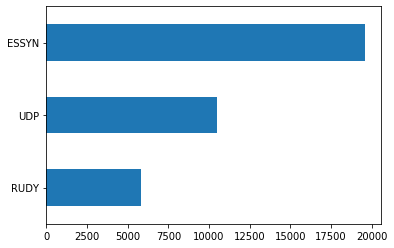

In [10]:
# Count number of entries for each value in 'type' column
attack_types = attack_df['type'].value_counts()
# Take the top 3, sort these in descending order and plot as a horizontal bar graph
attack_types.head(3).sort_values().plot.barh()
# Display the graph
plt.show()

### Two statistics that aren't listed above

#### How often is port 80 used in port_service_type
ESSYN is a type of DDoS that exploits a weakness in the TCP connection sequence. Because this attack type was done quite often by this booter it can be concluded that most of the target victims did not protect themselves against this common vulnerability to prevent DDoS. UDP is another type of DDoS attack where random ports are flooded with UDP packets. RUDY stands for R U Dead Yet and performs slow-rate attacks by submitting long form fields to a web server. RUDY is much more difficult to detect than most other types of DDoS attacks.
	Another statistic that was looked at is the amount of times in which port 80 was used for the attacks. The circle diagram below shows which percentage of the total amount of attacks has been performed on which port. Port 80 was used in 37571 out of the 48773 attacks, or 77% of the time. 

The number and percentage below show how often port 80 has been used in attacks. This is interesting because port 80 is the HTTP port, so it shows how often a HTTP connection has been targeted.
The circlediagram below shows which percentage of the total amount of attacks has been performed on which port.

The data has been determined by filtering the entries in the column 'port_service_type' on value 80. The circlediagram has been created from the counts of occurneces of each entry in this column.

37571 out of 48773
77%


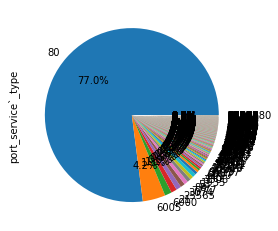

In [11]:
# Get entries in 'port_service' column that equal 80
port80_attacks = attack_df[attack_df['port_service`_type']==80]
# Display lenght of entries, resulting in int of entries in the DataFrame compared to total number of entries
print(str(len(port80_attacks)) + ' out of ' + str(len(attack_entries)))
# Calculate and display percentage of '80' entries
print(str(int(len(port80_attacks)/len(attack_entries)*100))+'%')

# Count number of entries for each value in 'port_service' column
port80_plot = attack_df["port_service`_type"].value_counts()
# Plot pie graph
port80_plot.plot.pie(autopct='%1.1f%%')
# Display graph
plt.show()

#### What percentage of attacks got stopped
Not all of the 48773 attacks that were carried out using this booter website were all successful. The graph below shows the amount of attacks that were successful (0) and the amount of attacks that were stopped (1). 

The numbers and circlediagram below show how many of the attacks got stopped, and how many didn't. A '1' in the column 'stopped' means that the attack from that entry got stopped, a '0' means it didn't get stopped. Simply counting the amount of 1's and 0's in this column provide us with the data displayed below.

27690 out of 48773
56%


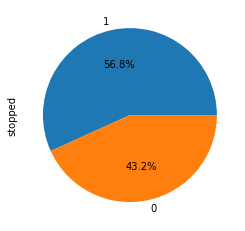

In [12]:
# Get entries in 'stopped' column that equal 1
stopped_attacks = attack_df[attack_df['stopped']==1]
# Display lenght of entries, resulting in int of entries in the DataFrame compared to total number of entries
print(str(len(stopped_attacks)) + ' out of ' + str(len(attack_entries)))
# Calculate and display percentage of '1' entries
print(str(int(len(stopped_attacks)/len(attack_entries)*100))+'%')

# Count number of entries for each value in 'stopped' column
stopped_attacks = attack_df["stopped"].value_counts()
# Plot pie graph
stopped_attacks.plot.pie(autopct='%1.1f%%')
# Display graph
plt.show()

Out of the 48773 attacks, a total of 27690 attacks were stopped. This is 56,8% of all of the attacks that were carried out by this booter. 

## Conclusion

As the results above show, some more insight into what kind of information can be leaked from a booter database was retrieved. 48773 entries were found in the database, which means the amount of attacks performed and facilitated by this booter was 48773 at the time of the leak. The number of unique users, clients that actually use this service, was 277. This shows that one user performed more than one attack. On average, the users of this specific booter performed around 176 attacks. The people that actually use this kind of booter are not just testing it our trying this out, but they use the service multiple times. This could indicate that the users of this specific booter used the service mostly to perform attacks rather than for testing purposes, by testing how vulnerable their own website is to DDoS attacks. 
	When analyzing the users that performed most of the attacks it was found that the user with ID 272 performed a little over 2000 attacks. All of the top ten users together performed over 1000 attacks. This supports our previous conclusion that users use this website to perform many attacks rather than to perform a few tests.
The longest attack duration performed by the booter is 500000. From analyzing the database this appears to be the longest attack duration this particular booter offers. This conclusion was drawn because there are multiple attacks done with this duration and none that are longer.	
Taking a look at the top ten most attacked ip addresses shows that all of these have been attacked more than a hundred times. This could indicate that the booter is used for coordinated attacks and not for testing purposes. The same goes for the top ten domain names, but something else popped up there as well. Four of the top ten most attacked domain names are aimed at the same victim. Four variants of yourpshome.net are included in the top ten. In the top ten most attacked domain names there are also two ajnabi domains. This shows that attackers have used the booter to try to shut down multiple domains of a victim. Krebsonsecurity.com was not in the top ten of either the victim ip addresses or the domain names, because only 15 attacks were performed on this website using this particular booter website. 
The top three types of attacks used are ESSYN, UDP and RUDY. All the attack type data from the booter database could be used to see what types of attacks are the most popular and this can be used to protect against these attacks in the future. In this case, awareness could be raised for better security to prevent these types of attacks from succeeding. 
The other statistics that were analyzed were the amount of attacks that used port 80 as the port service type. This particular port was chosen because port 80 is the default port for web servers. This default port turned out to be used for 77% of the attacks. This information could be used to spread awareness for cybersecurity. Port 80 is associated with web traffic and is usually open. This statistic proves that people should be more cautious. 
Another analyzed statistic is how many of the attacks were stopped and how many were not. Assuming that one means yes and zero means no, 56.8% of the attacks have been stopped. It is difficult to draw conclusions from this. It could mean that the attacker stopped the attack, but it could also possibly mean the attack was stopped because of other reasons. This could be because DDoS protection defended the victim or that the victim took another type of action. 
There are some limitations to this research. First off, the dataset used only represents data from one website, specifically a booter website. This means that it cannot be assumed that the results and conclusions of this research also applies to datasets of  different types of website, or even other booter websites. To obtain a full view of information in data leaks, other databases should be analyzed. Secondly, it was not possible to confirm that all of the data is 100% accurate. Although it appears that the dataset is valid, there could be inaccuracies within the dataset. This research has given an insight into how these kinds of booter websites work. All of these limitations do not mean the conclusions of this research are not valuable, but should be taken into account in future research. More research is necessary to find out how or if these kinds of practices can be stopped effectively. 
